# <span style="color:darkorange"> Correlatie & lineaire regressie opdracht - League of legends
<img src="Lol.jpg">

</br>
</br>



<img src="League of legends.jpg">

Voor een korte uitleg over League of Legends bekijk dit [youtube filmpje](https://www.youtube.com/watch?v=BGtROJeMPeE&feature=youtu.be)

Het bestand 'LoL_team_stats.csv' bevat:

| Variable Name |Description |
| --- | --- | 
|kills	|number of kills by the entire team (numeric)|
|deaths|	number of deaths in the entire team (numeric)|
|assists|	 number of assists by the entire team (numeric)|
|killingsprees  |	amount of killing sprees of the entire team (numeric)|
|double kills|	amount of double kills by the entire team (numeric)|
|tripple kills|	amount of tripple kills by the entire team (numeric)|
|totdmgdealt|	total damage dealt by the entire team (numeric)|
|totdmgtochamp	| total damage dealt by the entire team to enemy champions (numeric) |
|totheal |	total amount of damage healed by the entire team (numeric)|
|totunitshealed |	total amount of units healed by the entire team (numeric|
|dmgtoobj |	total damage to objectives(turret, nexus, inhibitor) by the entire team|
|dmgtoturrets |	total damage to turrets (numeric)|
|visionscore |	total vision score by the entire team(numeric)|
|totdmgtaken |	total damage taken by the entire team (numeric)|
|goldearned |	total amount of gold earned by the entire team(numeric)|
|goldspent  |	total amount of gold spent by the entire team(numeric)|
|turretkills |	number of turretkills by the entire team (numeric)|
|inhibkills | number of turretkills by the entire team (numeric)|
|totminionskilled | number of minions killed by the entire team(numeric)|
|neutralminionskilled | number of minions killed in the jungle (numeric)|
|totcctimedealt | total crowd control time (ability to directly hinder a unit's ability to fight e.g. a stun) dealt (numeric)|
|pinksbought| number of vision wards bought (https://leagueoflegends.fandom.com/wiki/Vision_Ward) (numeric)|
|wardsbought| numer of wards bought (numeric)|
|wardsplaced| number of wards placed (numeric)|
|wardskilled | number of wards killed (numeric)|
|largestkillingspree| the largest killing spree of the team (numeric)|
|largestmultikill | largest multi kill of the team (numeric)|
|largestcrit| largest critical strike of the team (numeric)|
|ownjunglekills| amount of own jungle kills (numeric)|
|enemyjunglekills| amount of enemy jungle kills (numeric) |
|win | Wheter the team won or lost (binary: 0:Loss, 1: Win) | 


Deze statistieken zijn afkomstig van teams die aan "the red side" spelen

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style
import seaborn as sns
from sklearn import datasets, linear_model
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
import warnings
warnings.filterwarnings("ignore")

import scipy
import scipy.stats

In [2]:
df = pd.read_csv('LoL_team_stats.csv')
df.head()

,kills,deaths,assists,killingsprees,doublekills,triplekills,totdmgdealt,totdmgtochamp,totheal,totunitshealed,dmgtoobj,dmgtoturrets,visionscore,totdmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,neutralminionskilled,totcctimedealt,pinksbought,wardsbought,wardsplaced,wardskilled,largestkillingspree,largestmultikill,largestcrit,ownjunglekills,enemyjunglekills,win
0,39,20,56,9,1,0,693679,104497,22618,8,66422,23578,138,94699,67965,63133,8,2,661,132,1735,7,0,54,10,12,2,843,81,30,1
1,32,20,41,7,3,1,436371,69090,13829,11,40373,27746,80,72978,53872,44493,6,2,499,87,1137,2,0,41,5,6,3,1211,41,28,1
2,33,39,45,10,2,1,671974,110564,49455,7,47074,15259,116,166427,68135,57945,6,0,759,114,2137,0,0,69,1,4,3,486,51,48,1
3,45,28,70,10,4,0,478826,90721,23158,12,63302,21778,115,117501,62032,54033,7,1,568,57,1312,3,0,49,5,8,2,817,19,25,1
4,39,32,52,12,1,0,584743,116459,28432,12,36481,24004,78,122907,65539,57500,7,4,665,101,2007,5,0,49,6,5,2,1686,53,34,1


In [3]:
df.shape

(47581, 31)

#### <span style="color:deeppink"> Hoeveel spellen werden er gewonnen en hoeveel spellen werden er verloren? Visualiseer dit aan de hand van de gepaste grafiek en bereken de percentages gewonnen en verloren spellen. </span>

Het aantal gewonnen games in procent is 47.638763371934175 dit komt neer op 22667 gewonnen games en het aantal losses 52.361236628065825 en komt neer op 24914 verloren games


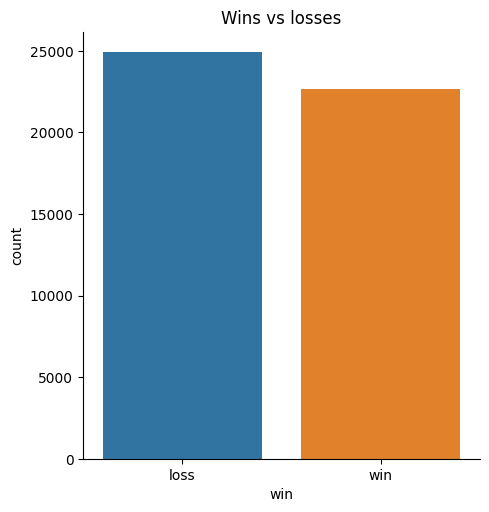

In [4]:

sns.catplot(data=df, x='win',kind='count')
plt.xticks([0,1],['loss','win'])
plt.title('Wins vs losses')

tot = df['win'].count()
tot_wins = df[df['win']==1]['win'].count()
tot_loss= df[df['win']==0]['win'].count()
proc_loss = (tot_loss/tot)*100
proc_win = (tot_wins/tot)*100
print(f'Het aantal gewonnen games in procent is {proc_win} dit komt neer op {tot_wins} gewonnen games en het aantal losses {proc_loss} en komt neer op {tot_loss} verloren games')

#### <span style="color:deeppink"> Welke kolom heeft de grootste negatieve impact op een win? En welke de grootste positieve impact?


Turret kills hebben de grootse impact en de kleinste is wards bought


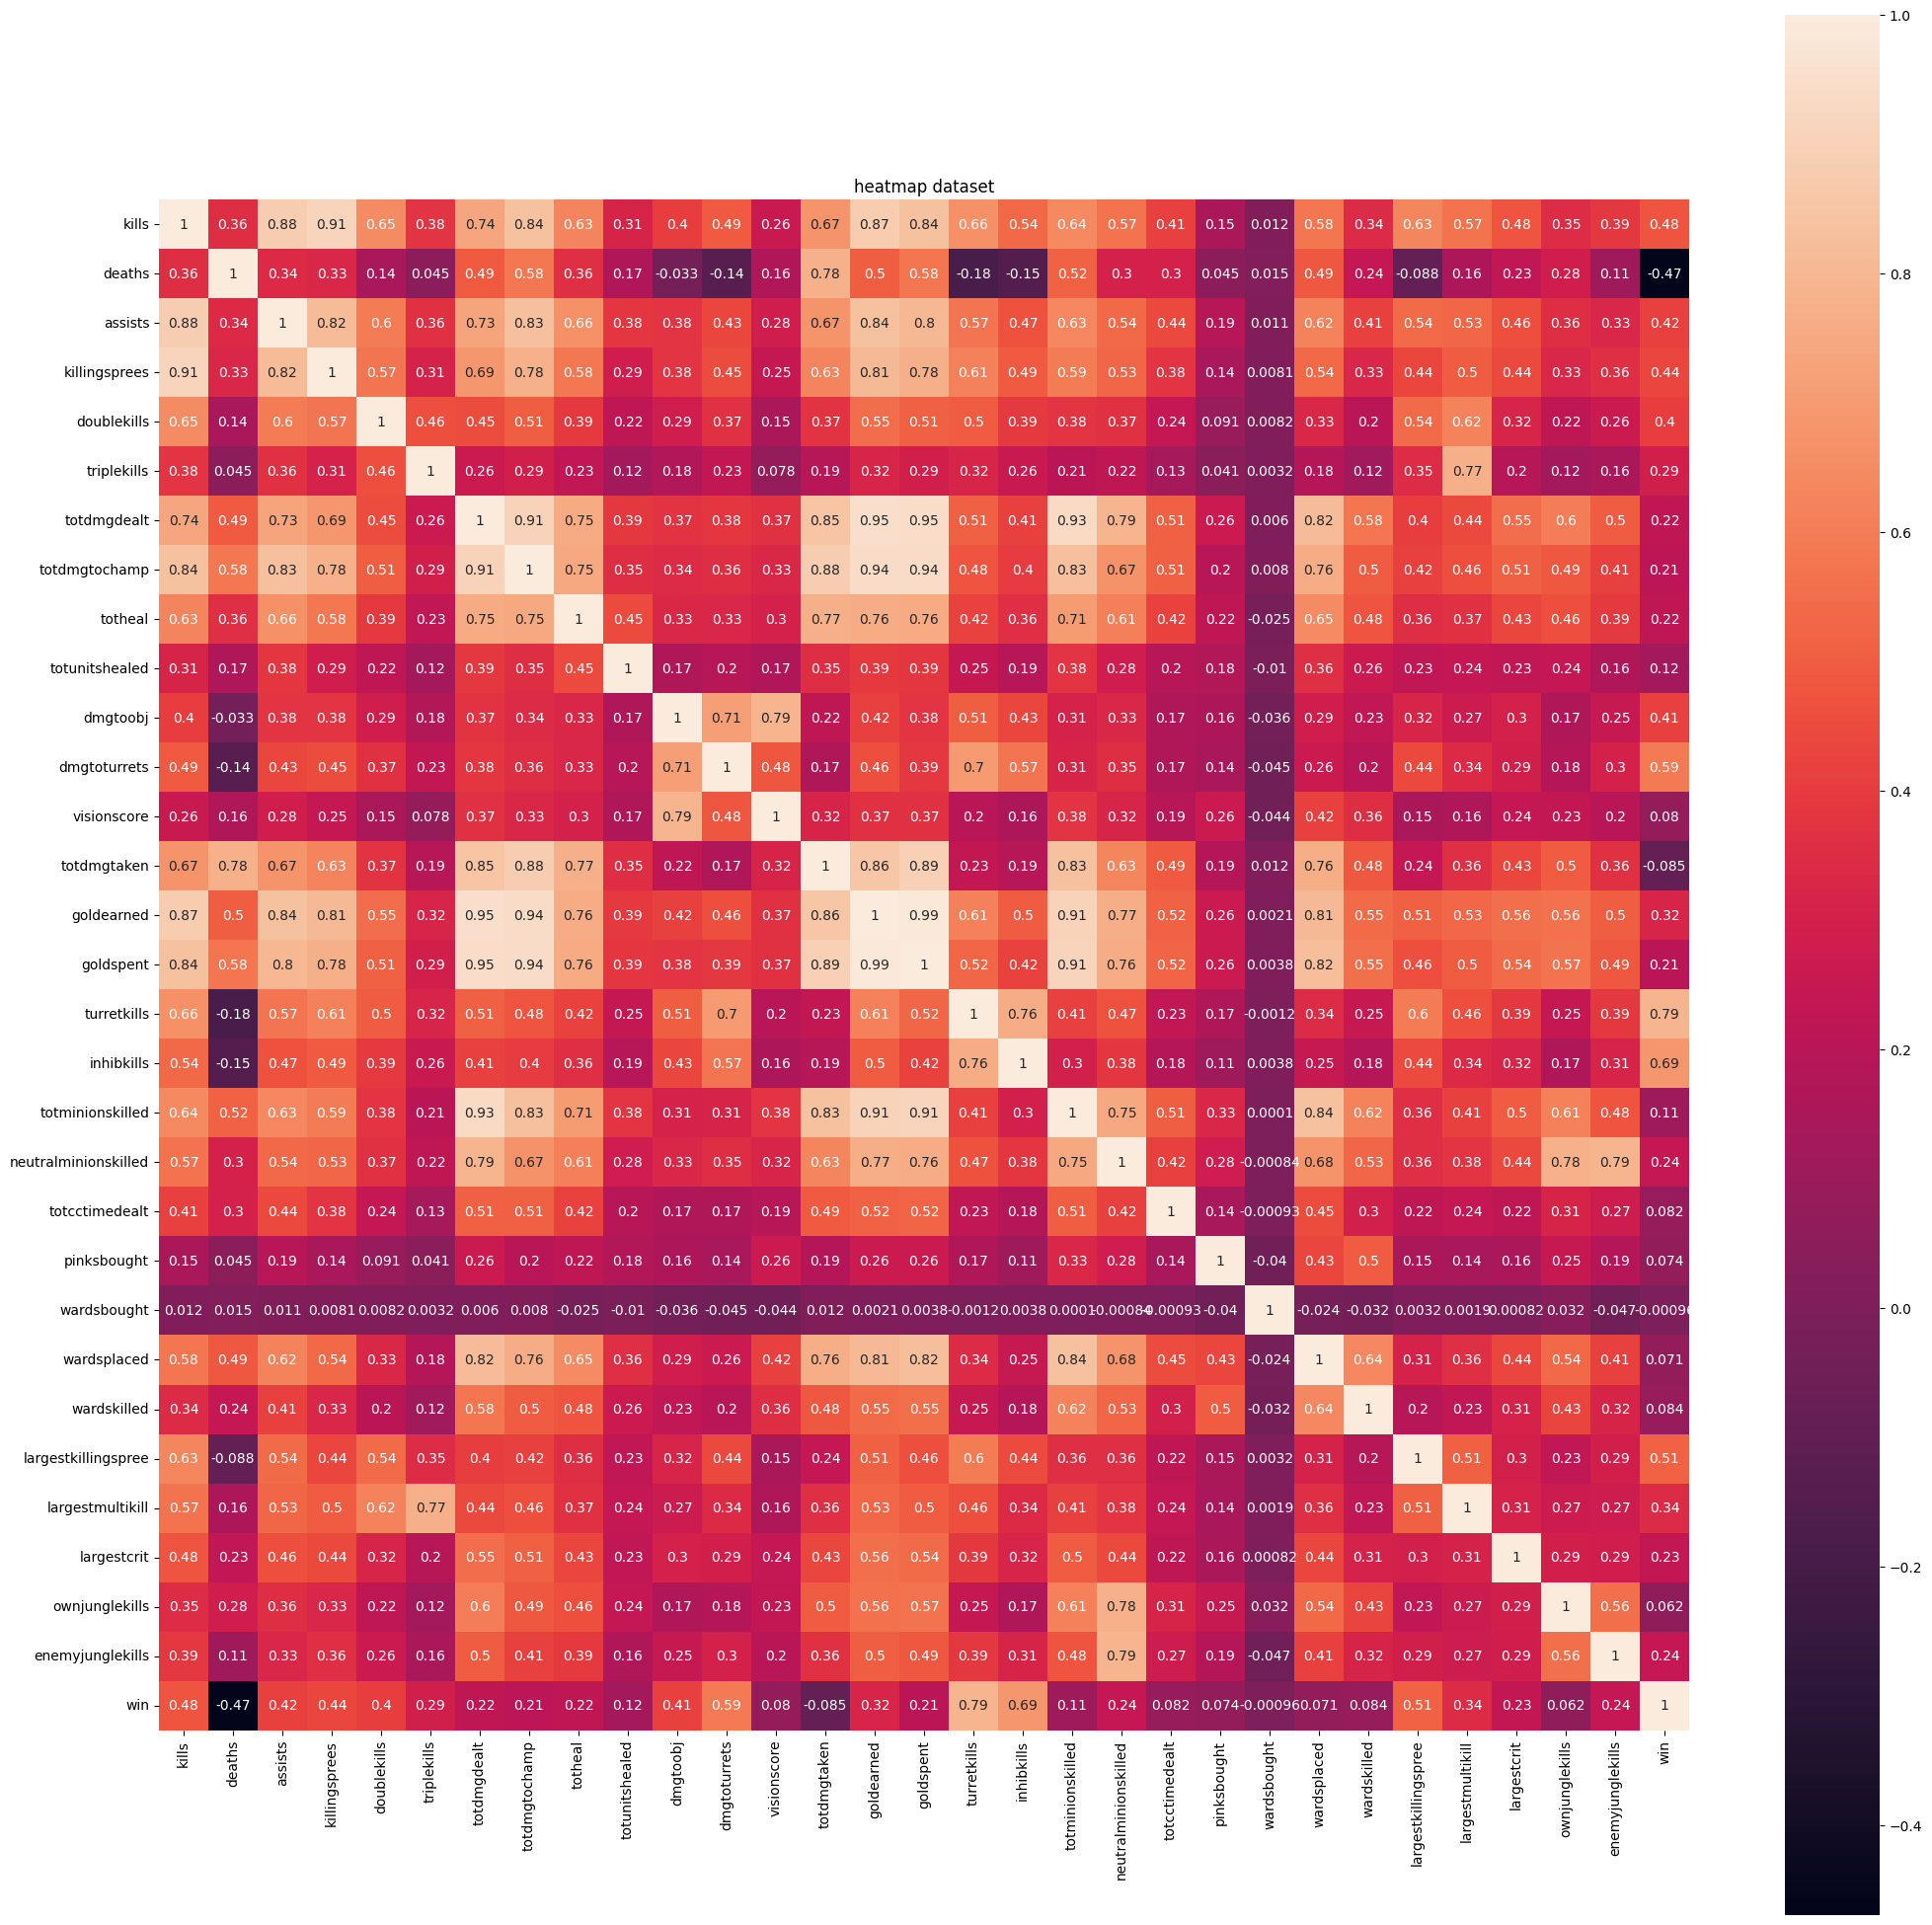

In [5]:
corr= df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(data=corr,square=True, annot=True)
plt.title("heatmap dataset")
print(f'Turret kills hebben de grootse impact en de kleinste is wards bought')

#### <span style="color:deeppink"> Bepaal de correlatie tussen de volgende kolommen:

| kolom 1 | kolom 2 |
| --- | --- | 
|total damage dealt	| total minions killed |
|wards placed |	total damage dealt |
|total damage taken	| total healed |
|gold spent |	total damage taken |
|gold spent |	total damage dealt |
|gold spent |	total healed |

In [6]:
print(f"De cor tussen total damage dealt en total minion kills {corr['totdmgdealt']['totminionskilled']}")
print(f"De corr tussen wards placed en total damage dealt is {corr['wardsplaced']['totdmgdealt']}")
print(f"De corr tussen total damage taken en total healed {corr['totdmgtaken']['totheal']}")
print(f"De corr tussen gold spent en total damage taken is {corr['goldspent']['totdmgtaken']}")
print(f"De corr tussen gold spent en total damage dealt is {corr['goldspent']['totdmgdealt']}")
print(f"De corr tussen gold spent en total healed is {corr['goldspent']['totheal']}")

De cor tussen total damage dealt en total minion kills 0.9318434673375816
De corr tussen wards placed en total damage dealt is 0.8175627996536574
De corr tussen total damage taken en total healed 0.7719440185677889
De corr tussen gold spent en total damage taken is 0.8924579691010052
De corr tussen gold spent en total damage dealt is 0.945896884911595
De corr tussen gold spent en total healed is 0.7564625959491911


#### <span style="color:deeppink"> Bepaal de regressielijn tussen de kills & de total damage to champs

In [7]:
# Tekenen van de regressielijn tussen 'age' en 'thalach'
from sklearn.linear_model import LinearRegression
# Regressielijn
def find_regressionline(dataset: pd.DataFrame, x: str, y: str) -> LinearRegression:
    onafhankelijke_variabele = dataset[x].values
    afhankelijke_variabele = dataset[y].values

    regressionline = LinearRegression()
    regressionline.fit(onafhankelijke_variabele.reshape(-1,1), afhankelijke_variabele)

    return regressionline

def plot_regressionline(dataset: pd.DataFrame, x: str, y:str, regressielijn: LinearRegression, title:str) -> None:
    plt.figure()
    sns.scatterplot(x=dataset[x], y=dataset[y], data=dataset,color='orange',s=100)
    sns.lineplot(dataset[x],regressielijn.predict(dataset[x].values.reshape(-1,1)),color='violet',linewidth=3)
    sns.set_style("darkgrid")
    plt.title(title)
    plt.show()

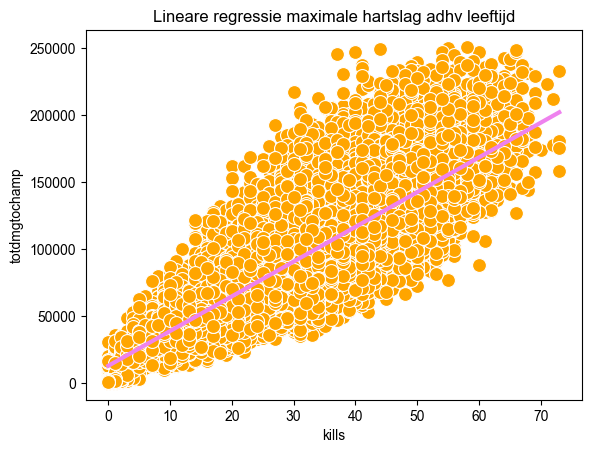

In [8]:
line = find_regressionline(df, 'kills', 'totdmgtochamp')
plot_regressionline(df, 'kills', 'totdmgtochamp', line, 'Lineare regressie maximale hartslag adhv leeftijd')

Probeer de total damage to champs te voorspellen als er 12 kills zijn.

In [9]:
x_value= np.array([[12]])
damage = line.predict(x_value)

print('De totale damage is: ',damage[0])

De totale damage is:  43910.06360527807


Indien je de outliers verwijdert uit de dataset, resulteert dit in een betere voorspelling?

In [10]:
stdev = df['totdmgtochamp'].std()
avg = df['totdmgtochamp'].mean()
# Uitschieters via standaardafwijking
uitschieter_boven = df[(df['totdmgtochamp']>avg+(3*stdev))]['totdmgtochamp']
uitschieter_onder = df[(df['totdmgtochamp']<avg-(3*stdev))]['totdmgtochamp']
df['kills'].count()
for i in uitschieter_onder:
    df.drop(df.index[df['totdmgtochamp']==i].tolist(), inplace=True)
for i in uitschieter_boven:
    df.drop(df.index[df['totdmgtochamp']==i].tolist(), inplace=True)
df['kills'].count()


47334

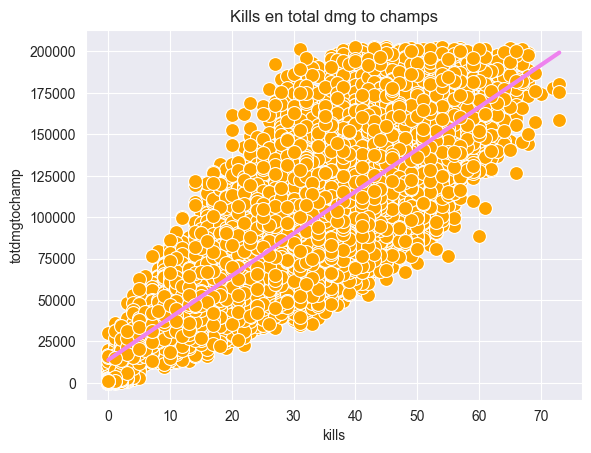

In [11]:
line = find_regressionline(df, 'kills', 'totdmgtochamp')
plot_regressionline(df, 'kills', 'totdmgtochamp', line, 'Kills en total dmg to champs')

Probeer de total damage taken te voorspellen als er 12 deaths zijn gevallen.

In [12]:
x_value= np.array([[12]])
damage = line.predict(x_value)

print('De totale damage is: ',damage[0])

De totale damage is:  44381.41388907115


#### <span style="color:deeppink"> Bereken de regressielijn tussen gold earned en de damage to turrets

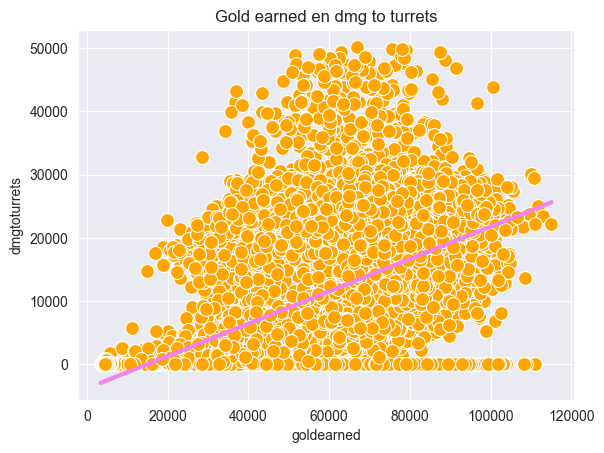

In [13]:
line = find_regressionline(df, 'goldearned', 'dmgtoturrets')
plot_regressionline(df, 'goldearned', 'dmgtoturrets', line, 'Gold earned en dmg to turrets')

In [14]:
x_value= np.array([[60000]])
damage = line.predict(x_value)

print('De totale damage is: ',damage[0])

De totale damage is:  11506.921314652087


Heeft hier het verwijderen van de outliers enige invloed?
Bekijk de grafiek aandachtig, zijn er foutieve of onlogische waarden aanwezig in de dataset? Heeft het verwijderen van dit soort data een invloed op de voorspelling?

In [15]:
stdev = df['goldearned'].std()
avg = df['goldearned'].mean()
# Uitschieters via standaardafwijking
uitschieter_boven = df[(df['goldearned']>avg+(3*stdev))]['goldearned']
uitschieter_onder = df[(df['goldearned']<avg-(3*stdev))]['goldearned']
df['goldearned'].count()
for i in uitschieter_onder:
    df.drop(df.index[df['goldearned']==i].tolist(), inplace=True)
for i in uitschieter_boven:
    df.drop(df.index[df['goldearned']==i].tolist(), inplace=True)
df['goldearned'].count()

47326

In [16]:
x_value= np.array([[60000]])
damage = line.predict(x_value)

print('De totale damage is: ',damage[0])

De totale damage is:  11506.921314652087


#### <span style="color:deeppink"> Bereken de regressielijn tussen kills & gold earned

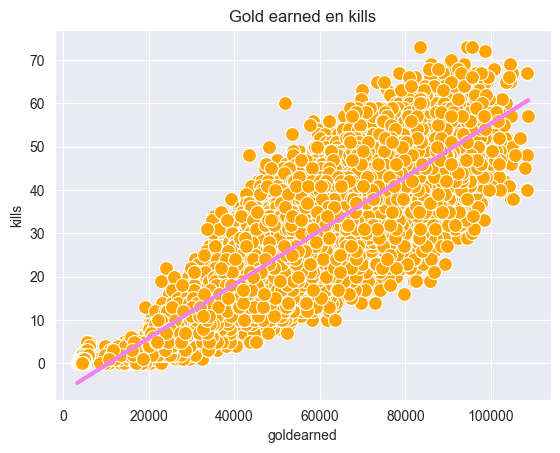

In [17]:
line = find_regressionline(df, 'goldearned', 'kills')
plot_regressionline(df, 'goldearned', 'kills', line, 'Gold earned en kills')

#### <span style="color:deeppink"> Kan je een betere voorspelling van total damage to champs aan de hand van het aantal kills doen indien je de winst of verlies in rekening brengt?

<AxesSubplot:xlabel='kills', ylabel='totdmgtochamp'>

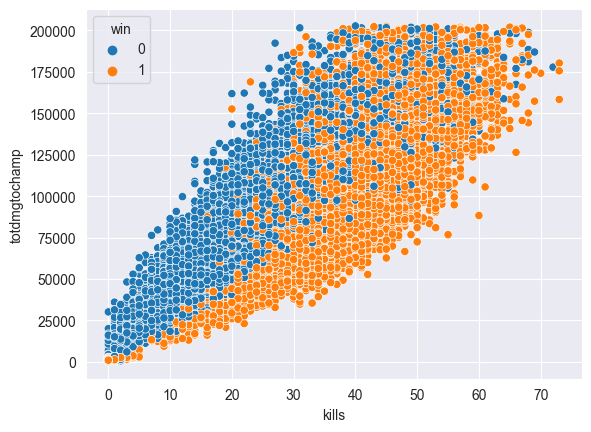

In [18]:
sns.scatterplot(x='kills', y='totdmgtochamp', data=df,hue = 'win')

Wat is de voorspelde total damage to champs bij 12 kills bij winst en verlies?

#### <span style="color:deeppink"> Kan je een betere voorspelling van damage to turret doen aan de hand van gold earned indien je de winst of verlies in rekening brengt?  
Je mag outliers of foutieve waarden uit de dataset verwijderen.

#### <span style="color:deeppink"> Kan je een betere voorspelling van gold earned doen aan de hand van kills indien je de winst of verlies in rekening brengt?  